PROJET DE PRISE DE DECISION SUR LES DONNEES DE STRATEGIE MARKETING D'UNE BANQUE

L'équipe Marketing de la banque PortuGBank, a mené des actions commerciales sur son portefeuille de client sur une période de 4 ans. Durant cette période d'action,  qui s'est faite principalement par appel téléphonique et entretient, des données qualitatives et quantitatives ont été collectées. Ces données au nombre de vingt-un (21) variables dont la principale est la variable cible Y: a souscrit ou n'a pas souscrit à l'offre DAT.

Notre banque souhaite vendre une offre de souscription de DAT à sa clientèle. Elle veut optimiser son coût de campagne marketing par la mise en place d'un protocole performant de ciblage des clients. En d'autre terme , elle souhaite augmenter le taux d'acceptation de ses offres DAT, avec moins d'action commerciale à réaliser (coût d'acquisition du client sur l'offre DAT minimal).

Il a été identifié 41 188 clients, pour lesquels 21 informations ont été collectées dans notre dataset.

**les informations sont sègmentées en cinq(5) groupes:**

1. **Les données socio-démographique** ( âge du client, le type de job , situation matrimoniale, le niveau d'éducation). Ces données ont t'ils une influence sur la variable cible (Y) souscrire ou non à un dépôts à terme?

2. **Historique financière** (avoir un défaut de paiement , un prêt immobilier et un prêt personnel), peut t'il impacter la décision de d'épargner ou pas en DAT?

3. **Données de contact** (le type de moyen de contact, le mois et le jour de la semaine où le contact s'est fait et la durée de communication en seconde), sont t'ils des facteurs influencant la souscription au DAT?

4. **Historique de la campagne** (le nombre d'appels réalisées pendant la campagne , le nombre de jours écoulés depuis le dernier appel, le nombre de contacts effectués lors de la dernière campagne (previous) et le resultat obtenu lors de la dernière campagne (poutcome)

5. **Données macro-économiques **( le taux de variation de l'emploi , le nombre d'employés , l'inflation , la confiances des consommateurs et le taux d'intérêts interbancaire), sont des variables qui peuvent influencer la décision du client d'épargner ou non).

Voici les préoccupations que nous allons tenter d'appporter des éclairages , à lalumière de cette première analyse.

Nous avons identifié des **variables numériques** (Age , duration, campaign , pdays , previous , emp.var.rate , cons.price.idx , cons.conf.idx, euribor 3m et nr.employed)

Nous avons également relevé des variables catégorielles norminales et ordinales (job, marital , education, default ,housing, loan , contact , month, day_of_week , poutcome et la cible Y).

Ci-après un descriptif et notre première compréhension de la base de données.


In [ ]:
#Importation des bibliotheques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
# Chargement du dataset
bank_data_full = '/content/sample_data/bank-additional-full.csv'
bank_data_full = pd.read_csv(bank_data_full, sep=';')  # Le fichier utilise probablement ";" comme séparateur
# Sauvegarde du dataset dans Google Colab
file_path = '/content/bank_additional_full_copy.csv'
bank_data_full.to_csv(file_path, index=False)
# Afficher les premières lignes pour examiner la structure
bank_data_full.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Calcul des statistiques descriptives pour les variables catégorielles
categorical_summary = bank_data_full.describe(include=['object'])

# Affichage des résultats
print("Statistiques Descriptives - Variables Catégorielles :")
display(categorical_summary)

Statistiques Descriptives - Variables Catégorielles :


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


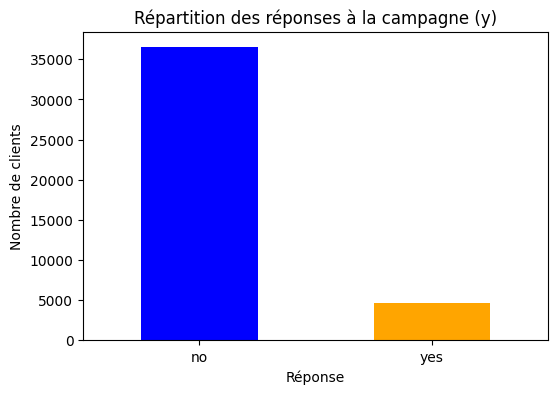

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compter les valeurs de la variable cible
plt.figure(figsize=(6, 4))
bank_data_full['y'].value_counts().plot(kind='bar', color=['blue', 'orange'])

# Ajouter des titres et labels
plt.title("Répartition des réponses à la campagne (y)")
plt.xlabel("Réponse")
plt.ylabel("Nombre de clients")
plt.xticks(rotation=0)

# Afficher le graphique
plt.show()

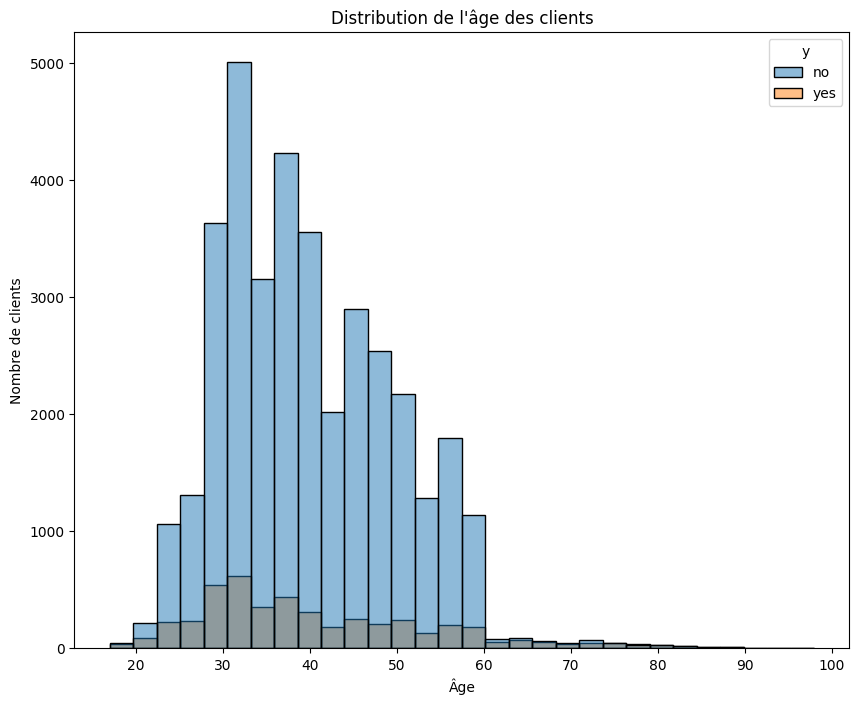

In [ ]:
# Taille du graphique avec la fonction plt.figure()
plt.figure(figsize=(10, 8))
sns.histplot(data= bank_data_full, x='age', hue='y', bins=30, kde=False, color="skyblue" , edgecolor='black')

plt.title("Distribution de l'âge des clients")
plt.xlabel("Âge")
plt.ylabel("Nombre de clients")
plt.show()

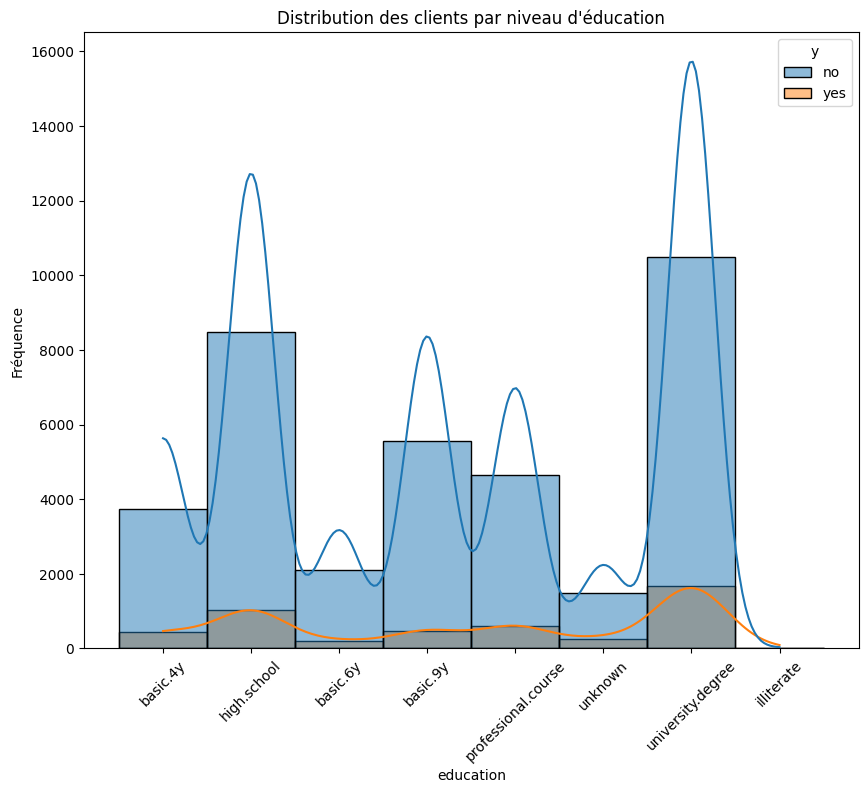

In [ ]:
# Répresentation selon le niveau d'éducation
plt.figure(figsize=(10, 8))
sns.histplot(data=bank_data_full, x='education', hue='y', bins=30, kde=True, color="blue")

plt.title("Distribution des clients par niveau d'éducation")
plt.xlabel("education")
plt.ylabel("Fréquence")
plt.xticks(rotation=45)
plt.show()

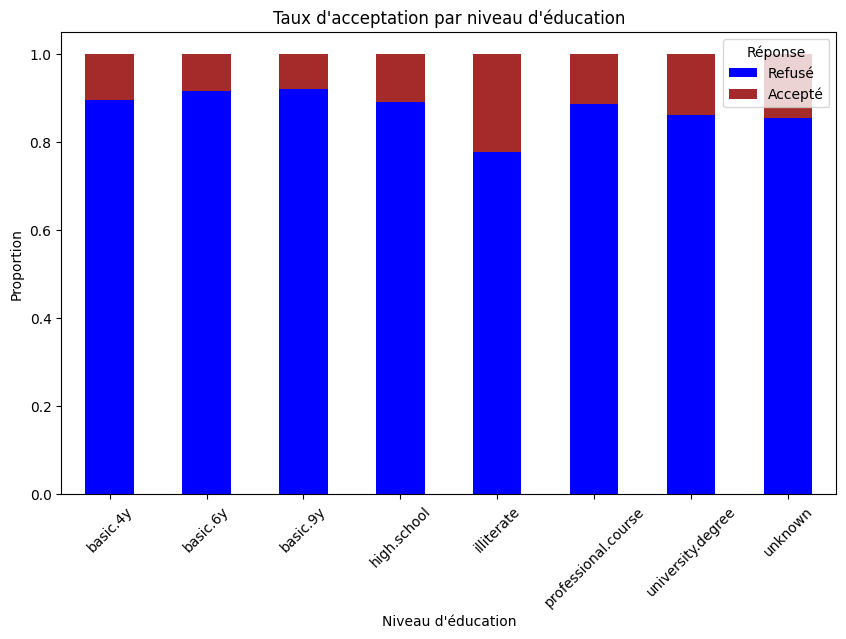

In [ ]:

# Calculer la proportion de réponses "yes" et "no" par niveau d'éducation
education_y = bank_data_full.groupby('education')['y'].value_counts(normalize=True).unstack()

# Création du graphique en barres empilées
education_y.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'brown'])

# Ajouter des titres et labels
plt.title("Taux d'acceptation par niveau d'éducation")
plt.xlabel("Niveau d'éducation")
plt.ylabel("Proportion")
plt.legend(title="Réponse", labels=['Refusé', 'Accepté'])
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


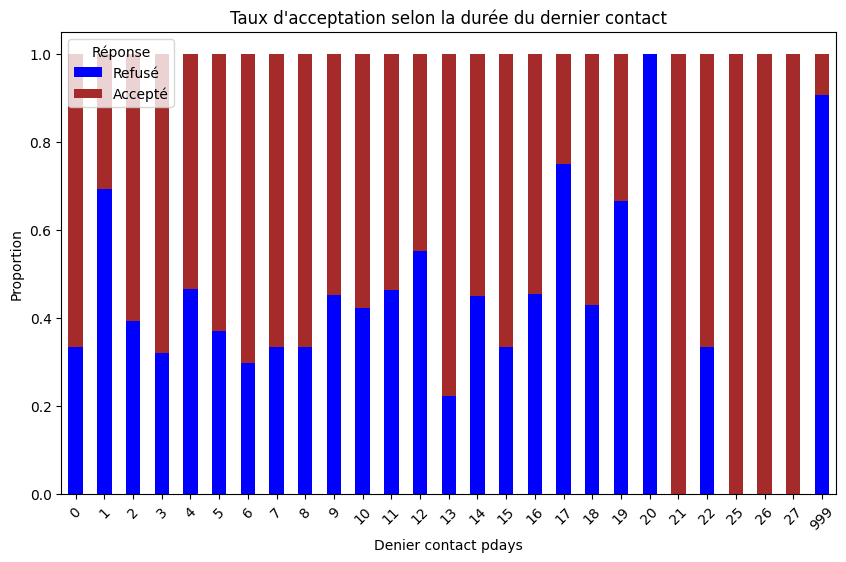

In [ ]:
# Calculer la proportion de réponses "yes" et "no" selon la nombre de jours du dernier contact
pdays_y = bank_data_full.groupby('pdays')['y'].value_counts(normalize=True).unstack()

# Création du graphique en barres empilées
pdays_y.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'brown'])

# Ajouter des titres et labels
plt.title("Taux d'acceptation selon la durée du dernier contact")
plt.xlabel("Denier contact pdays")
plt.ylabel("Proportion")
plt.legend(title="Réponse", labels=['Refusé', 'Accepté'])
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


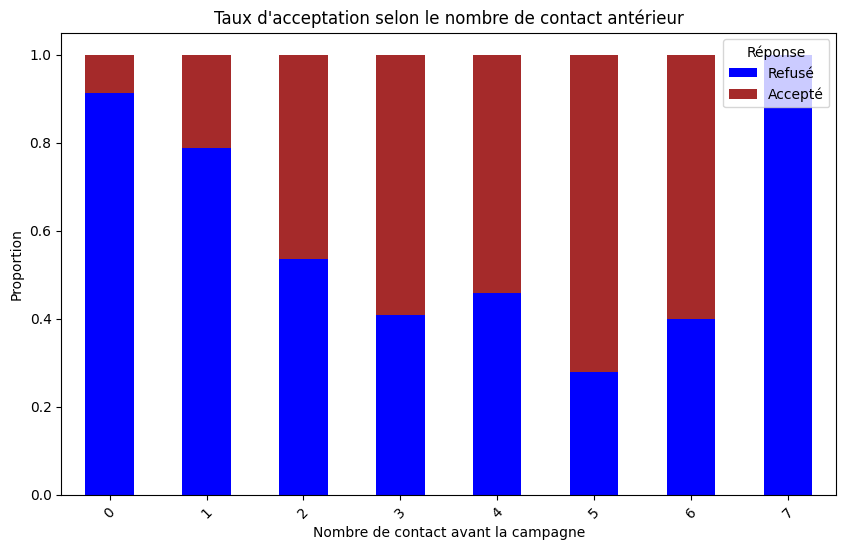

In [ ]:
# Calculer la proportion de réponses "yes" et "no" par niveau d'éducation
previous_y = bank_data_full.groupby('previous')['y'].value_counts(normalize=True).unstack()

# Création du graphique en barres empilées
previous_y.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'brown'])

# Ajouter des titres et labels
plt.title("Taux d'acceptation selon le nombre de contact antérieur")
plt.xlabel("Nombre de contact avant la campagne")
plt.ylabel("Proportion")
plt.legend(title="Réponse", labels=['Refusé', 'Accepté'])
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


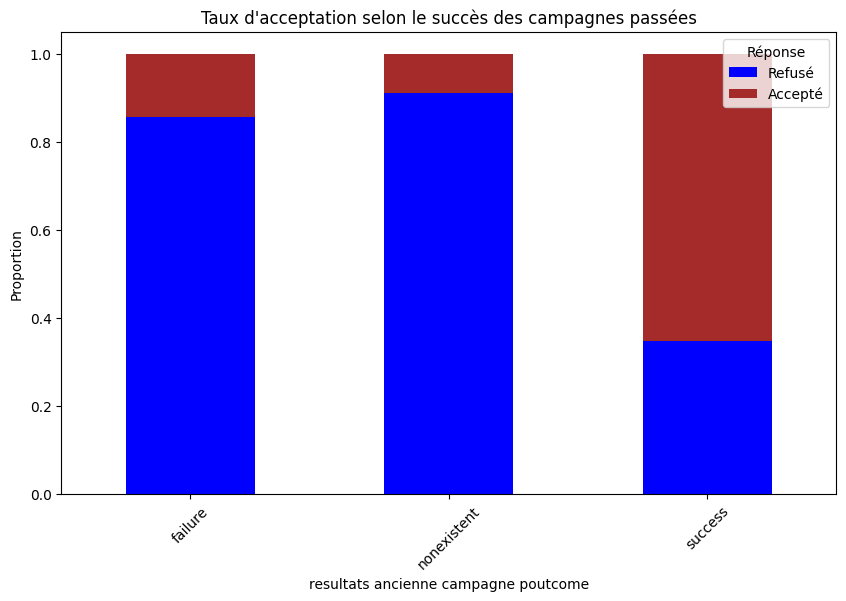

In [ ]:
# Calculer la proportion de réponses "yes" et "no" selon les resultats passés
poutcome_y = bank_data_full.groupby('poutcome')['y'].value_counts(normalize=True).unstack()

# Création du graphique en barres empilées
poutcome_y.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'brown'])

# Ajouter des titres et labels
plt.title("Taux d'acceptation selon le succès des campagnes passées")
plt.xlabel("resultats ancienne campagne poutcome")
plt.ylabel("Proportion")
plt.legend(title="Réponse", labels=['Refusé', 'Accepté'])
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


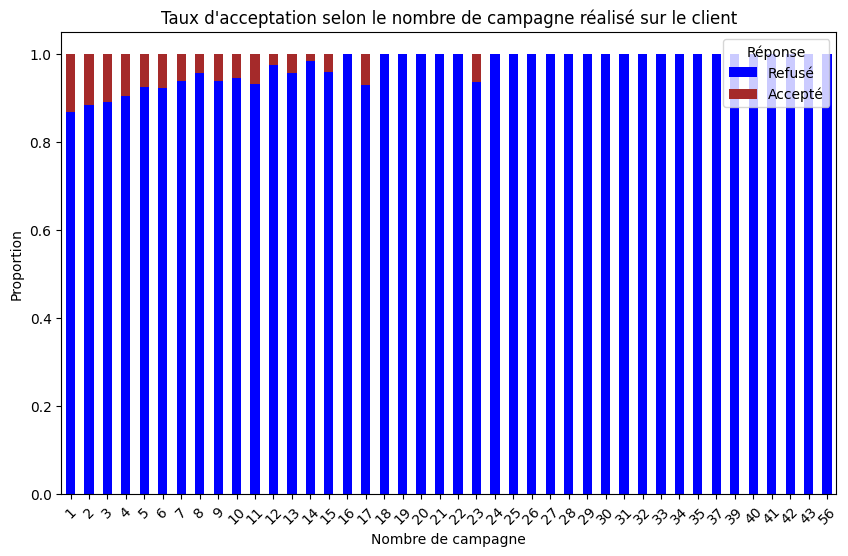

In [ ]:
# Calculer la proportion de réponses "yes" et "no" par nombre de campagne
campaign_y = bank_data_full.groupby('campaign')['y'].value_counts(normalize=True).unstack()

# Création du graphique en barres empilées
campaign_y.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'brown'])

# Ajouter des titres et labels
plt.title("Taux d'acceptation selon le nombre de campagne réalisé sur le client")
plt.xlabel("Nombre de campagne")
plt.ylabel("Proportion")
plt.legend(title="Réponse", labels=['Refusé', 'Accepté'])
plt.xticks(rotation=45)

# Afficher le graphique
plt.show()


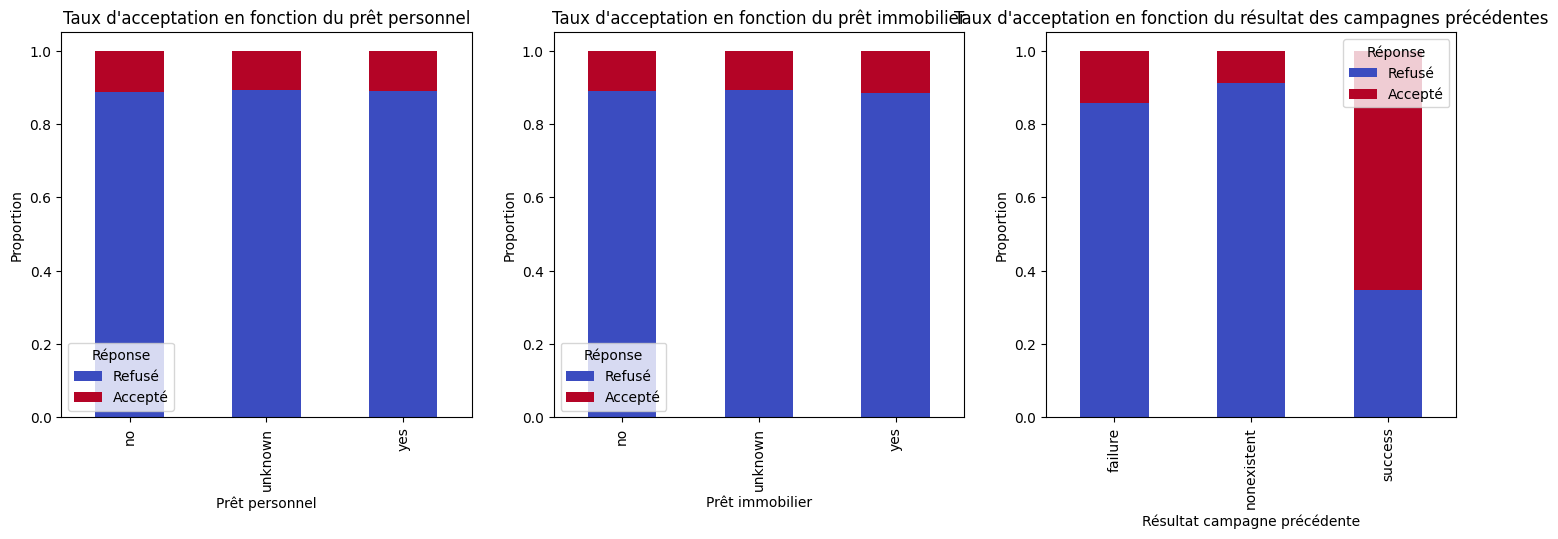

In [ ]:
# Création des tableaux de proportions pour chaque variable analysée
loan_y = bank_data_full.groupby('loan')['y'].value_counts(normalize=True).unstack()
housing_y = bank_data_full.groupby('housing')['y'].value_counts(normalize=True).unstack()
poutcome_y = bank_data_full.groupby('poutcome')['y'].value_counts(normalize=True).unstack()

# Création de la figure avec 3 sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Graphique pour l'impact du prêt personnel
loan_y.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[0])
axes[0].set_title("Taux d'acceptation en fonction du prêt personnel")
axes[0].set_xlabel("Prêt personnel")
axes[0].set_ylabel("Proportion")
axes[0].legend(title="Réponse", labels=['Refusé', 'Accepté'])

# Graphique pour l'impact du prêt immobilier
housing_y.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[1])
axes[1].set_title("Taux d'acceptation en fonction du prêt immobilier")
axes[1].set_xlabel("Prêt immobilier")
axes[1].set_ylabel("Proportion")
axes[1].legend(title="Réponse", labels=['Refusé', 'Accepté'])

# Graphique pour l'impact du résultat des campagnes précédentes
poutcome_y.plot(kind='bar', stacked=True, colormap='coolwarm', ax=axes[2])
axes[2].set_title("Taux d'acceptation en fonction du résultat des campagnes précédentes")
axes[2].set_xlabel("Résultat campagne précédente")
axes[2].set_ylabel("Proportion")
axes[2].legend(title="Réponse", labels=['Refusé', 'Accepté'])

# Affichage des graphiques
plt.show()


### **Observations sur les variables catégorielles** :
- **Type d'emploi** : La catégorie la plus fréquente est *"admin."* (10 422 clients).
- **État matrimonial** : La majorité des clients sont *mariés* (24 928).
- **Niveau d'éducation** : Le niveau le plus fréquent est *"university.degree"* (12 168 clients).
- **Prêts** :
  - 21 576 clients ont un prêt immobilier (`housing=yes`).
  - 33 950 clients n’ont pas de prêt personnel (`loan=no`).
- **Type de contact** : *Cellular* est le plus fréquent (26 144 contacts).
- **Mois du contact** : Mai est le mois où le plus de contacts ont été établis (13 769 interactions).
- **Résultat de la campagne précédente** : Pour 35 563 clients, il n’y avait **aucune interaction précédente** (`poutcome=nonexistent`).
- **Réponse à la campagne** : 36 548 clients ont refusé l’offre (`y=no`), tandis que 4 640 ont accepté (`y=yes`).


### **Points clés  des visualisations :**
1. **Répartition des réponses à la campagne (`y`)** :
   - **Beaucoup plus de refus** que d'acceptations (majorité écrasante de "no").
   - Indique une forte difficulté à convaincre les clients de souscrire à un dépôt à terme.

2. **Distribution de l'âge des clients** :
   - La majorité des clients se situent entre **30 et 60 ans**.
   - Il peut être intéressant d'examiner si certains groupes d'âge sont plus enclins à accepter l'offre.

3. **Taux d'acceptation par niveau d'éducation** :
   - Les clients ayant un **diplôme universitaire** ont le **taux d'acceptation le plus élevé**.
   - Les personnes ayant un **niveau d'éducation plus bas** semblent moins susceptibles d'accepter.


### **Regard plus détaillé sur la typologie des clients:**

1. **Impact du prêt personnel sur la souscription** :
   - Les clients **sans prêt personnel** sont plus enclins à accepter l'offre.
   - Ceux qui ont un prêt personnel semblent moins susceptibles de souscrire à un dépôt à terme, probablement pour des raisons de liquidité.

2. **Impact du prêt immobilier sur la souscription** :
   - Les clients **sans prêt immobilier** montrent un taux d'acceptation plus élevé.
   - Ceux ayant un prêt immobilier pourraient avoir moins de flexibilité financière pour investir dans un dépôt à terme.

3. **Impact des campagnes précédentes (`poutcome`)** :
   - Les clients ayant eu une **campagne précédente réussie** sont **beaucoup plus susceptibles** d'accepter l'offre.
   - Ceux n'ayant jamais été contactés avant (`nonexistent`) ou ayant eu une **campagne échouée** montrent un faible taux d'acceptation.

### **Segmentation potentiels des clients prioritaires** :
Sur la base de ces analyses,
**les segments qui paraissent les plus prometteurs**
pour les actions commerciales de la banque sont :

✅ Clients avec un **diplôme universitaire**.  
✅ Clients **sans prêt personnel**.  
✅ Clients **sans prêt immobilier** (mais à vérifier avec d'autres critères).  
✅ Clients ayant eu **une campagne précédente réussie**.  
✅ Clients d’âge **30-60 ans**, avec un potentiel d'investissement.

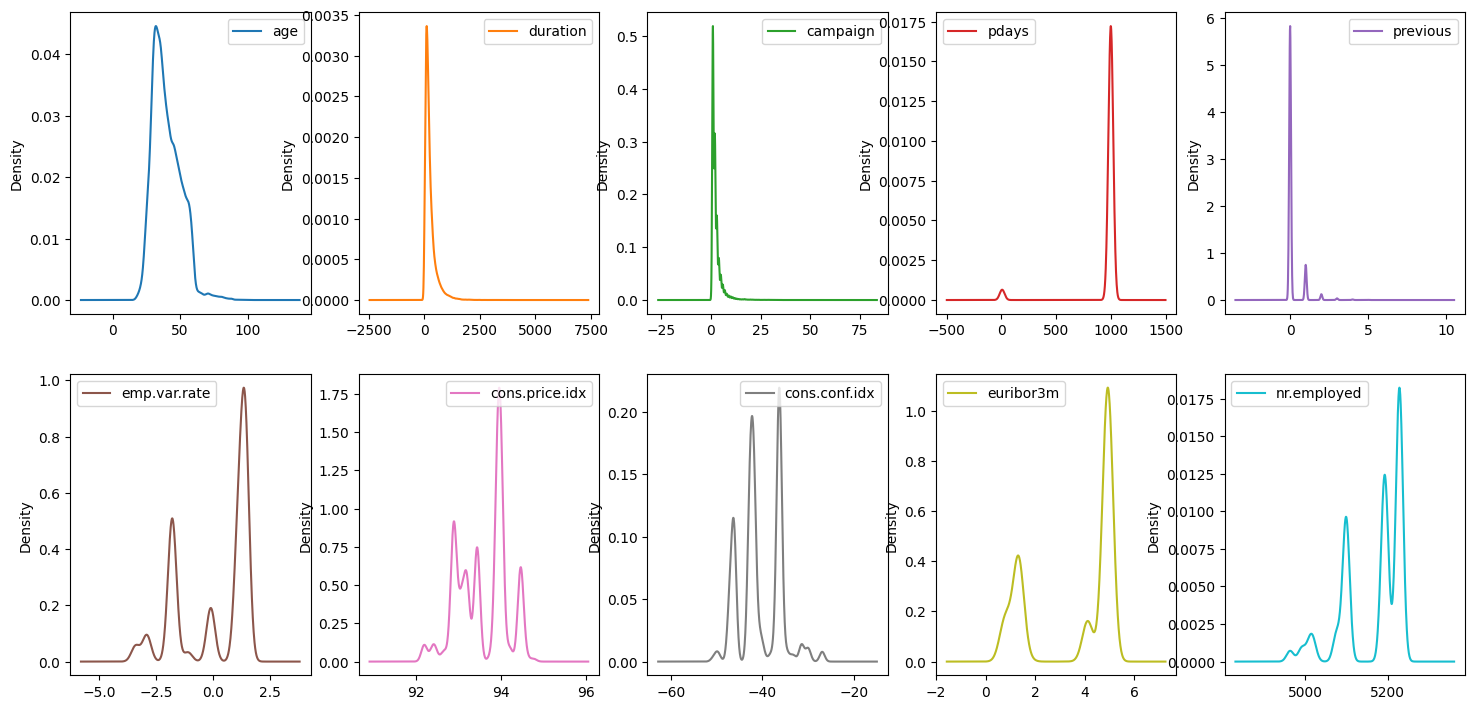

In [ ]:
bank_data_full.plot(kind='density',
        subplots=True, layout=(4,5), sharex=False, sharey=False, figsize=(18,18))
plt.show()

La majorité de nos données numériques ont une distribution étalée vers la droite avec des pointes. Nous pensons qu'il faut les normaliser pour mieux cerner leur impact sur la variable cible Y (acceptation ou non d'une offre DAT).

#II-PREPARATION DE DONNEES ET ANALYSES STATISTIQUES

1- PREPARATION DE DONNEES

a - Identification des valeurs manquantes et des valeurs abérrantes

In [ ]:
#Affichade du  dataset brut
bank_data_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:

#Identification des valeurs manquantes
print("\nValeurs manquantes/nulles par colonne :")
bank_data_full.isnull().sum()


Valeurs manquantes/nulles par colonne :


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [ ]:
# Occurrences de 'unknown' dans chaque colonne de type objet
unknown_values = bank_data_full.select_dtypes(include=['object']).apply(lambda x: (x == 'unknown').sum())
# colonnes contenant des 'unknown'
print("\nValeurs 'unknown' par colonne :")
print(unknown_values[unknown_values > 0])


Valeurs 'unknown' par colonne :
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64


In [ ]:
#Identification des valeurs aberrantes
#  variables numériques
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous',
                  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Détection des valeurs aberrantes par la méthode IQR
Abr = {}

for col in num_cols:
    Q1 = bank_data_full[col].quantile(0.25)
    Q3 = bank_data_full[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Stock du nombre de valeurs aberrantes
    Abr[col] = ((bank_data_full[col] < lower_bound) | (bank_data_full[col] > upper_bound)).sum()

# valeurs aberrantes par variables
Abr

{'age': 469,
 'duration': 2963,
 'campaign': 2406,
 'pdays': 1515,
 'previous': 5625,
 'emp.var.rate': 0,
 'cons.price.idx': 0,
 'cons.conf.idx': 447,
 'euribor3m': 0,
 'nr.employed': 0}

In [ ]:
# pourcentage de valeurs numeriques aberrantes
total_rows = len(bank_data_full)
Abr_percentage = {col: (count / total_rows) * 100 for col, count in Abr.items()}

# résultats
Abr_percentage

{'age': 1.1386811692726035,
 'duration': 7.193842866854423,
 'campaign': 5.8415072351170245,
 'pdays': 3.6782558026609693,
 'previous': 13.65689035641449,
 'emp.var.rate': 0.0,
 'cons.price.idx': 0.0,
 'cons.conf.idx': 1.0852675536564047,
 'euribor3m': 0.0,
 'nr.employed': 0.0}

b - Normalisation  des variables numériques du dataset

In [ ]:
import os
num_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.conf.idx']

# Initialisation du Rpbustscaler
scaler = RobustScaler()

# Application de la  transformation  sur les colonnes concernées
bank_data_normalised = bank_data_full.copy()
bank_data_normalised[num_cols] = scaler.fit_transform(bank_data_normalised[num_cols])
#Statistiques descriptive du dataset
bank_data_normalised[num_cols].describe()
#  chemin de sauvegarde
save_path = '/content/bank_data_normalised.csv'

# répertoire si il n'existe pas
os.makedirs(os.path.dirname(save_path), exist_ok=True)

# Sauvegarde du  dataset transformé dans un fichier CSV
bank_data_normalised.to_csv(save_path, index=False)
bank_data_normalised.describe()
# Message de confirmation
print(f"Le dataset transformé a été sauvegardé avec succès à l'emplacement : {save_path}")


Le dataset transformé a été sauvegardé avec succès à l'emplacement : /content/bank_data_normalised.csv


In [ ]:
#Statistiques descriptive après normalisation
bank_data_normalised.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.134937,0.360760,0.283796,-36.524546,0.172963,0.081886,93.575664,0.205936,3.621291,5167.035911
std,0.694750,1.194835,1.385007,186.910907,0.494901,1.570960,0.578840,0.734635,1.734447,72.251528
min,-1.400000,-0.829493,-0.500000,-999.000000,0.000000,-3.400000,92.201000,-1.428571,0.634000,4963.600000
25%,-0.400000,-0.359447,-0.500000,0.000000,0.000000,-1.800000,93.075000,-0.142857,1.344000,5099.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,93.749000,0.000000,4.857000,5191.000000
75%,0.600000,0.640553,0.500000,0.000000,0.000000,1.400000,93.994000,0.857143,4.961000,5228.100000
max,4.000000,21.834101,27.000000,0.000000,7.000000,1.400000,94.767000,2.365079,5.045000,5228.100000


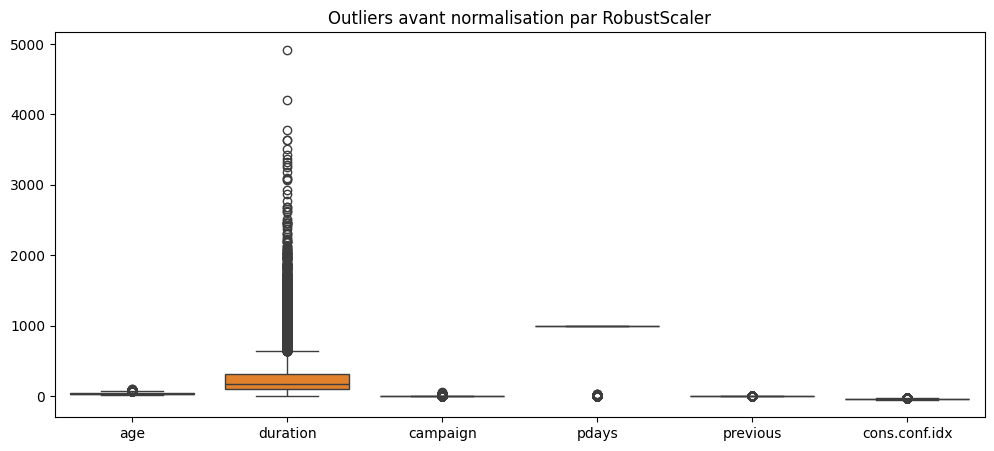

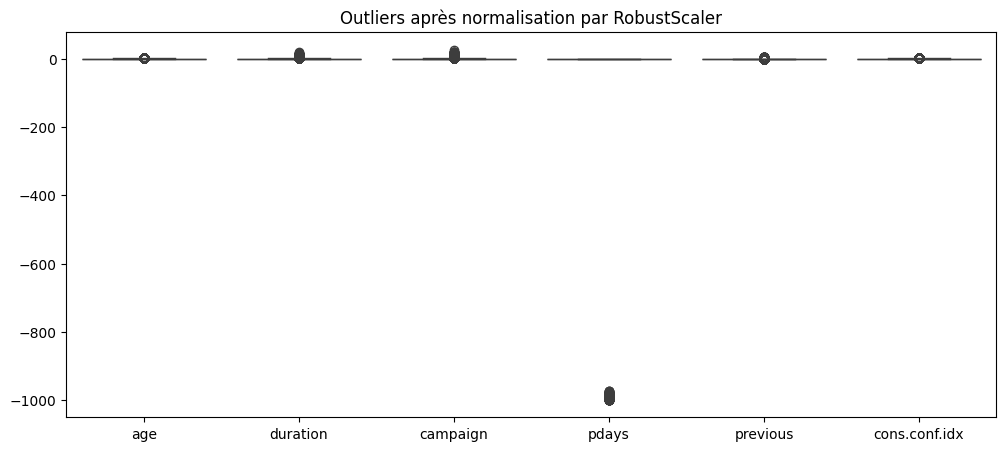

In [ ]:
#Visualisation des Outliers  avant et aprés la Normalisation

# Avant normalisation
plt.figure(figsize=(12,5))
sns.boxplot(data=bank_data_full [num_cols])
plt.title("Outliers avant normalisation par RobustScaler")
plt.show()
# Après normalisation
plt.figure(figsize=(12,5))
sns.boxplot(data=bank_data_normalised[num_cols])
plt.title("Outliers après normalisation par RobustScaler")
plt.show()

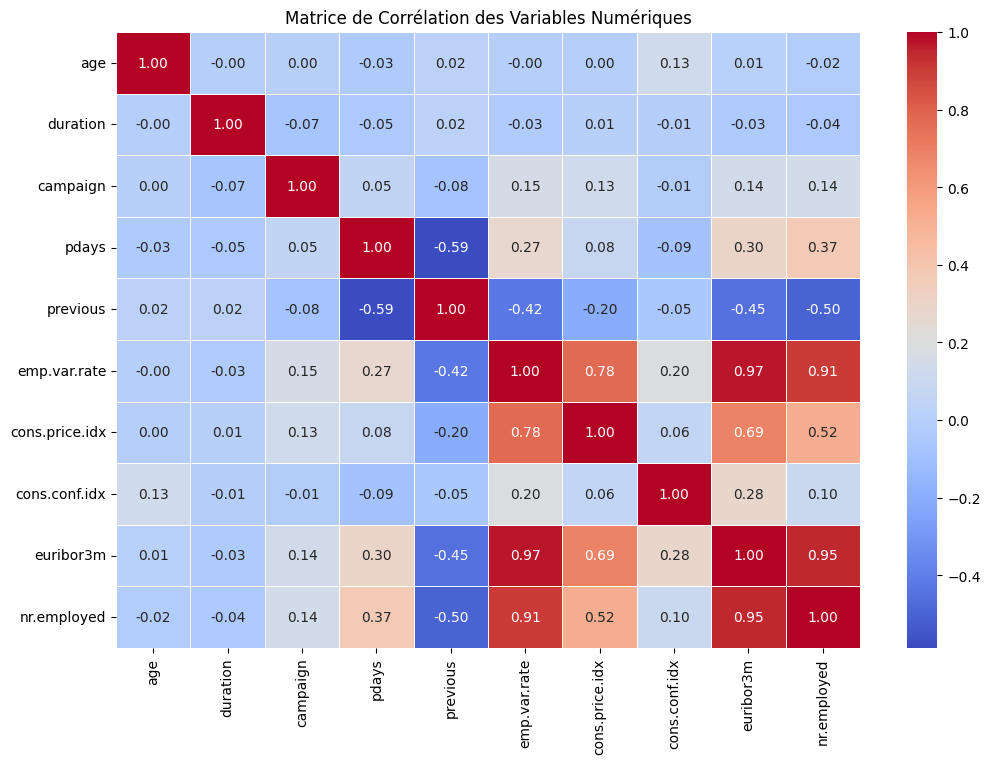

In [ ]:
# Colonnes numériques
numeric_cols = bank_data_normalised.select_dtypes(include=['float64', 'int64']).columns

# Matrice de corrélation pour les variables numériques
corr_matrix = bank_data_normalised[numeric_cols].corr()

# Affichage de la matrice de corrélation en heat map
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des Variables Numériques")
plt.show()

c - Encodage et élimination des variables insignifiantes

In [ ]:
# Copie du dataset pour éviter de modifier l'original
bank_data_encoded = bank_data_normalised.copy()

#  Encodage  des variables catégorielles (nominales et ordinales) avec Label Encoding
label_cols = ['loan', 'job', 'education', 'month', 'marital', 'contact', 'poutcome' ,  'day_of_week']
label_encoder = LabelEncoder()

for col in label_cols:
    bank_data_encoded[col] = label_encoder.fit_transform(bank_data_encoded[col])

#  One-Hot Encoding aux variables binaires ('housing', 'default', 'y')
binary_cols = ['housing', 'default', 'y']
for col in binary_cols:
    bank_data_encoded[col] = bank_data_encoded[col].map({'yes': 1, 'no': 0, 'unknown': 0})
# Chemin de sauvegarde temporaire sur Colab
file_path = "/content/bank_data_encoded.csv"

# Sauvegarde du DataFrame
bank_data_encoded.to_csv(file_path, index=False)

bank_data_encoded.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.200000,3,1,0,0,0,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
1,1.266667,7,1,3,0,0,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
2,-0.066667,7,1,3,0,1,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
3,0.133333,0,1,1,0,0,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
4,1.200000,7,1,3,0,0,2,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.466667,7,1,5,0,1,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
96,0.266667,4,1,6,0,0,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
97,1.000000,0,0,6,0,0,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
98,-0.066667,9,2,5,0,0,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0


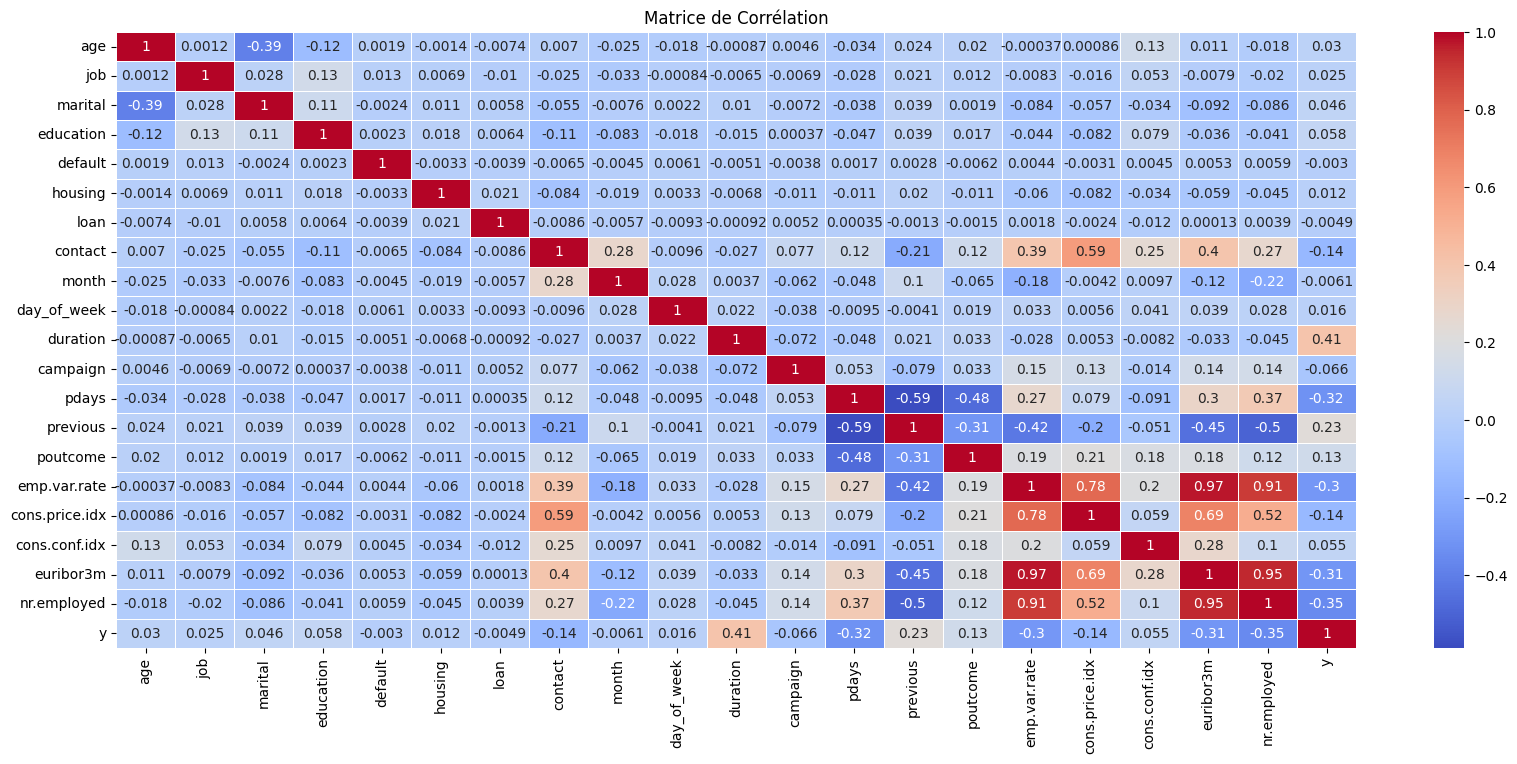

In [ ]:
#-Initiation d'une matrice de corrélation du dataset transformé et  encodé

corr_matrix_encoded = bank_data_encoded.corr()

#  heatmap des corrélations
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix_encoded, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()

In [ ]:
# Affichage des variables corrélées à la cible 'y'
corr_with_y = corr_matrix_encoded['y'].sort_values(ascending=False)

# Affichage des variables corrélées à la cible
print(corr_with_y)

y                 1.000000
duration          0.405274
previous          0.230181
poutcome          0.129789
education         0.057799
cons.conf.idx     0.054878
marital           0.046203
age               0.030399
job               0.025122
day_of_week       0.015967
housing           0.011743
default          -0.003041
loan             -0.004909
month            -0.006065
campaign         -0.066357
cons.price.idx   -0.136211
contact          -0.144773
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64


In [ ]:
from google.colab import files

bank_data_cleaned = bank_data_encoded.copy()


#Réstructuration du dataset  avec les variables corrélées
# Chemin de sauvegarde temporaire sur Colab
file_path = "/content/bank_data_cleaned.csv"

# Sauvegarde du DataFrame
bank_data_cleaned.to_csv(file_path, index=False)


# Affichage du dataset réstructuré avec les variables corrélées
print("\nDataset  réstructuré  avec les variables corrélées:")
bank_data_cleaned.head()


Dataset  réstructuré  avec les variables corrélées:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.200000,3,1,0,0,0,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
1,1.266667,7,1,3,0,0,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
2,-0.066667,7,1,3,0,1,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
3,0.133333,0,1,1,0,0,0,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0
4,1.200000,7,1,3,0,0,2,1,6,1,...,-0.5,0.0,0.0,1,1.1,93.994,0.857143,4.857,5191.0,0




2 - ANALYSES STATISTIQUES

Tests de normalité Kolmogorov-Smirnov et Shapiro Wilk

In [ ]:
# Importation des bibliothèques nécessaires
import scipy.stats as stats
import pandas as pd
import numpy as np

# Chargement du dataset
bank_data_full = '/content/sample_data/bank-additional-full.csv'
bank_data_full = pd.read_csv(bank_data_full, sep=';')  # Le fichier utilise probablement ";" comme séparateur

# Sélection des variables numériques
numerical_columns = bank_data_full.select_dtypes(include=[np.number]).columns.tolist()

# Initialisation d'un dictionnaire pour stocker les résultats
normality_results = {}

# Application des tests de normalité pour chaque variable numérique
for col in numerical_columns:
    data = bank_data_full[col].dropna()  # Suppression des valeurs manquantes

    # Test de Kolmogorov-Smirnov
    ks_stat, ks_p_value = stats.kstest(data, 'norm')

    # Test de Shapiro-Wilk (limité à 5000 observations max)
    if len(data) <= 5000:
        sw_stat, sw_p_value = stats.shapiro(data)
    else:
        sw_stat, sw_p_value = np.nan, np.nan  # Trop de données pour Shapiro-Wilk

    normality_results[col] = {
        "Kolmogorov-Smirnov p-value": ks_p_value,
        "Shapiro-Wilk p-value": sw_p_value if not np.isnan(sw_p_value) else "N/A"
    }

# Conversion des résultats en DataFrame pour affichage structuré
bank_data_full_normality = pd.DataFrame.from_dict(normality_results, orient='index')

# Affichage des résultats
print("Résultats des tests de normalité :")
print(bank_data_full_normality)


Résultats des tests de normalité :
                Kolmogorov-Smirnov p-value Shapiro-Wilk p-value
age                                    0.0                  N/A
duration                               0.0                  N/A
campaign                               0.0                  N/A
pdays                                  0.0                  N/A
previous                               0.0                  N/A
emp.var.rate                           0.0                  N/A
cons.price.idx                         0.0                  N/A
cons.conf.idx                          0.0                  N/A
euribor3m                              0.0                  N/A
nr.employed                            0.0                  N/A


Les P.value sont inférieures à 5% , nos variables numériques , ne suivent pas une distribution normale. Ce qui confirme bien nos visualisations en supra avec des gros pics et des courbes étalées vers la droite ou vers la gauche.
Les test khi 2 et ANOVA ne sont pas appropriés sur nos variables numériques.

In [ ]:
# Sélection des variables catégoriques
categorical_columns = bank_data_full.select_dtypes(include=['object']).columns.tolist()

# Initialisation d'un dictionnaire pour stocker les résultats du test Khi²
chi2_results = {}

# Boucle sur toutes les paires de variables catégoriques
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):  # Pour éviter les doublons
        var1 = categorical_columns[i]
        var2 = categorical_columns[j]

        # Création de la table de contingence
        contingency_table = pd.crosstab(bank_data_full[var1], bank_data_full[var2])

        # Application du test du Khi²
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

        # Stockage des résultats
        chi2_results[f"{var1} vs {var2}"] = {
            "Chi² Stat": chi2_stat,
            "p-value": p_value
        }

# Conversion des résultats en DataFrame pour un affichage structuré
bank_data_full_chi2 = pd.DataFrame.from_dict(chi2_results, orient='index')

# Affichage des résultats
print("Résultats du test du Khi² :")
print(bank_data_full_chi2)


Résultats du test du Khi² :
                             Chi² Stat        p-value
job vs marital             4197.469143   0.000000e+00
job vs education          37338.135156   0.000000e+00
job vs default             1927.657874   0.000000e+00
job vs housing               31.309064   8.996257e-02
job vs loan                  30.600387   1.045871e-01
job vs contact              684.285960  1.258932e-139
job vs month               4569.921516   0.000000e+00
job vs day_of_week           88.621022   7.745018e-05
job vs poutcome             838.483871  3.989181e-163
job vs y                    961.242440  4.189763e-199
marital vs education       1690.440038   0.000000e+00
marital vs default          756.217556  4.425322e-160
marital vs housing           12.926648   4.421568e-02
marital vs loan               3.328252   7.666618e-01
marital vs contact          216.474821   1.160716e-46
marital vs month            338.035779   1.760508e-55
marital vs day_of_week       26.648246   8.679830e-03


### ** Interprétation des Résultats du Test du Khi²**

### **Résumé des Principaux Résultats**
1. **Variables Fortement Corrélées (p-value < 0.05)**
   - **`job` vs `marital`** (p-value = 0.000)  → **Forte dépendance entre le métier et l’état matrimonial.**
   - **`job` vs `education`** (p-value = 0.000) → **Le métier est fortement lié au niveau d’éducation.**
   - **`education` vs `default`** (p-value = 0.000) → **Le niveau d’éducation influence la probabilité d’avoir un défaut de paiement.**
   - **`contact` vs `y`** (p-value = 0.000) → **Le type de contact utilisé influence la décision d’accepter l’offre.**
   - **`poutcome` vs `y`** (p-value = 0.000) → **Le résultat des campagnes précédentes affecte fortement la réponse actuelle.**
   - **`month` vs `y`** (p-value = 0.000) → **Le mois d’appel a un impact sur la décision du client.**
   - **`education` vs `loan`** (p-value = 0.04) → **Les personnes ayant un certain niveau d’éducation ont plus ou moins tendance à prendre un prêt.**
   
   **Conclusion** :
   Ces variables **sont fortement liées et peuvent être prises en compte** pour une meilleure segmentation des cibles en prenant prioritairement celles qui sont liées avec la décision de souscrire.
   le modèle prédictif devrait garder celles qui sont corrélées à la variable cible Y.

2. **Variables Indépendantes (p-value > 0.05)**

   - **`job` vs `loan`** (p-value = 0.19) → **Le métier n’affecte pas directement la souscription à un prêt.**
   - **`loan` vs `y`** (p-value = 0.79)  → **Le fait d’avoir un prêt n’a pas d’impact direct sur l’acceptation du dépôt à terme.**
   - **`housing` vs `poutcome`** (p-value = 0.29) → **Avoir un prêt immobilier n’est pas lié aux résultats des campagnes passées.**
   - **`marital` vs `loan`** (p-value = 0.76) → **Être marié ou célibataire n’a pas d’influence sur la souscription à un prêt.**

   **Conclusion** :
   Ces variables sont **indépendantes** et **n'ont pas d’impact direct** sur les décisions des clients.

### **Implications pour l’Analyse Marketing**
1. **Focalisation sur les variables fortement dépendantes** pour mieux segmenter les clients (comme job , éducation , contact , poutcome et month).  
2. **Personnalisation des campagnes marketing** en fonction de l’éducation, du mois de contact, et des résultats des campagnes précédentes.  
3. **Exclusion des variables non pertinentes** (comme `loan` et `marital` pour certaines analyses).  


#III-CONCEPTION DES MODELES D'APPRENTISSAGE ET VISUALISATION DES RESULTATS DE CHAQUE MODELE




X_train et X_test ont été sauvegardés

 Modèle : Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Probabilités  des prédictions des 20 premières observations:
[[0.91399273 0.08600727]
 [0.96424266 0.03575734]
 [0.98227529 0.01772471]
 [0.97982543 0.02017457]
 [0.98502859 0.01497141]
 [0.89247077 0.10752923]
 [0.97375857 0.02624143]
 [0.99247077 0.00752923]
 [0.98995103 0.01004897]
 [0.99244916 0.00755084]
 [0.83953974 0.16046026]
 [0.73634526 0.26365474]
 [0.58485518 0.41514482]
 [0.88265922 0.11734078]
 [0.98205983 0.01794017]
 [0.98877558 0.01122442]
 [0.98691506 0.01308494]
 [0.98760293 0.01239707]
 [0.98787446 0.01212554]
 [0.68357431 0.31642569]]

Prédictions des 100 premières observations:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Matrice de confusion:
[[7106  197]
 [ 539  396]]

Rapport de classification 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.73      8238
we

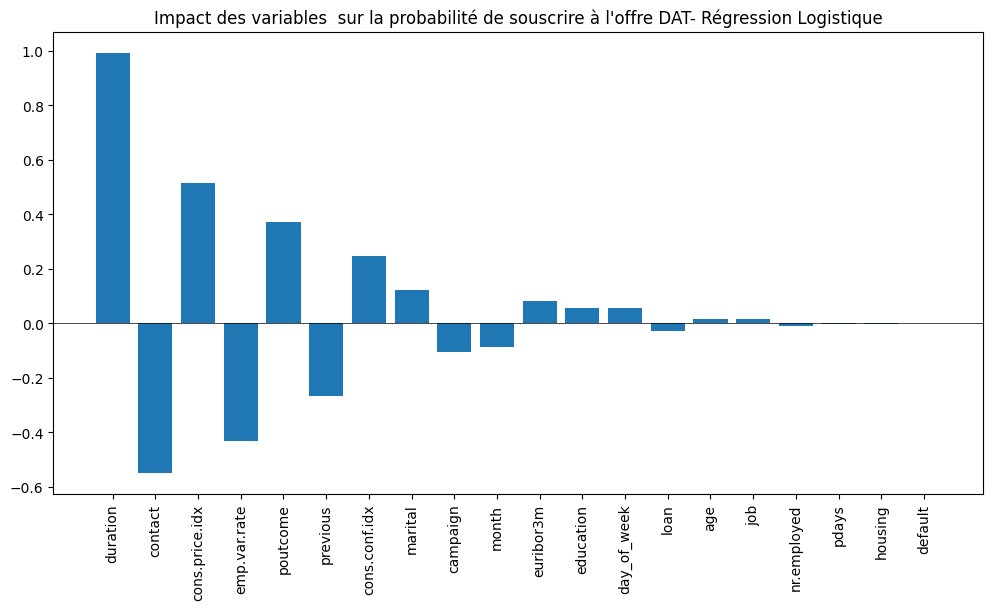

\ Liste des coefficients :RÉGRESSION LOGISTIQUE
duration: 0.9924713322903387
contact: -0.5492711709959374
cons.price.idx: 0.5158627978438509
emp.var.rate: -0.4327346911904121
poutcome: 0.37241819999826514
previous: -0.26686020297349006
cons.conf.idx: 0.24772466953988015
marital: 0.12296986283136602
campaign: -0.10512382706367253
month: -0.08638988756251609
euribor3m: 0.0827731044811484
education: 0.055583776796159376
day_of_week: 0.05437109038164001
loan: -0.02932708097945583
age: 0.016251943570732286
job: 0.0145497241964432
nr.employed: -0.01011533558871846
pdays: -0.0013880127434325014
housing: -0.0011447039074911187
default: -0.00025543139534819475
Le modèle Logistic Regression a été sauvegardé à l'emplacement : /content/sample_data/models/logistic_regression_model.pkl

 Modèle : Arbre de décisions
Probabilités  des prédictions des 20 premières observations:
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]


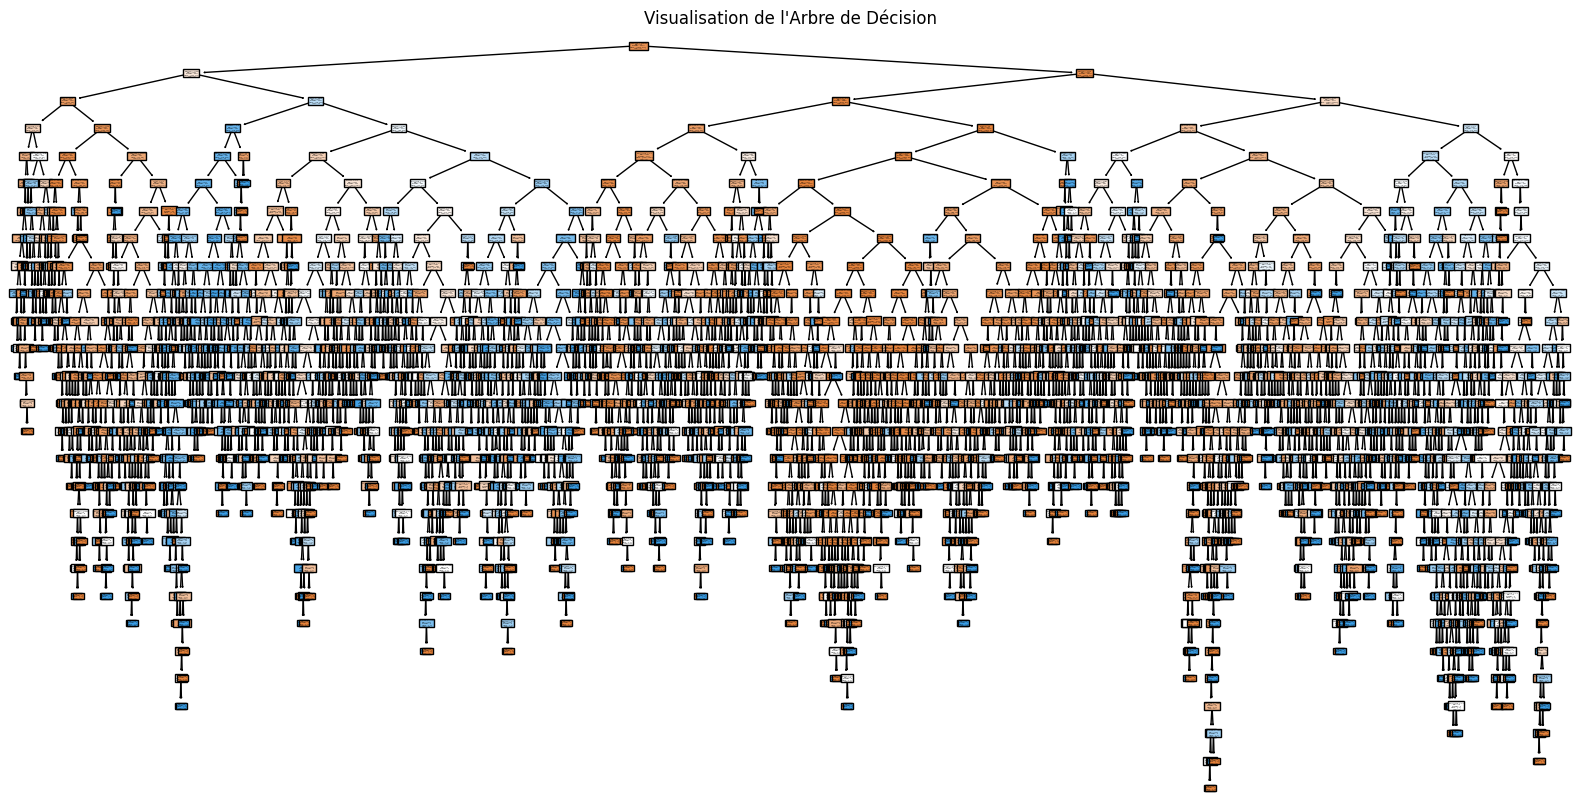

Le modèle Arbre de décisions a été sauvegardé à l'emplacement : /content/sample_data/models/arbre_de_décisions_model.pkl

 Modèle : Random Forest
Probabilités  des prédictions des 20 premières observations:
[[0.9  0.1 ]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.78 0.22]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 [0.88 0.12]
 [0.73 0.27]
 [0.57 0.43]
 [0.78 0.22]
 [1.   0.  ]
 [1.   0.  ]
 [0.99 0.01]
 [1.   0.  ]
 [0.99 0.01]
 [0.52 0.48]]

Prédictions des 100 premières observations:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Matrice de confusion:
[[7040  263]
 [ 448  487]]

Rapport de classification 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.65      0.52      0.58       935

    accuracy                           0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.91      0.91      0.91      8238

Random Forest:


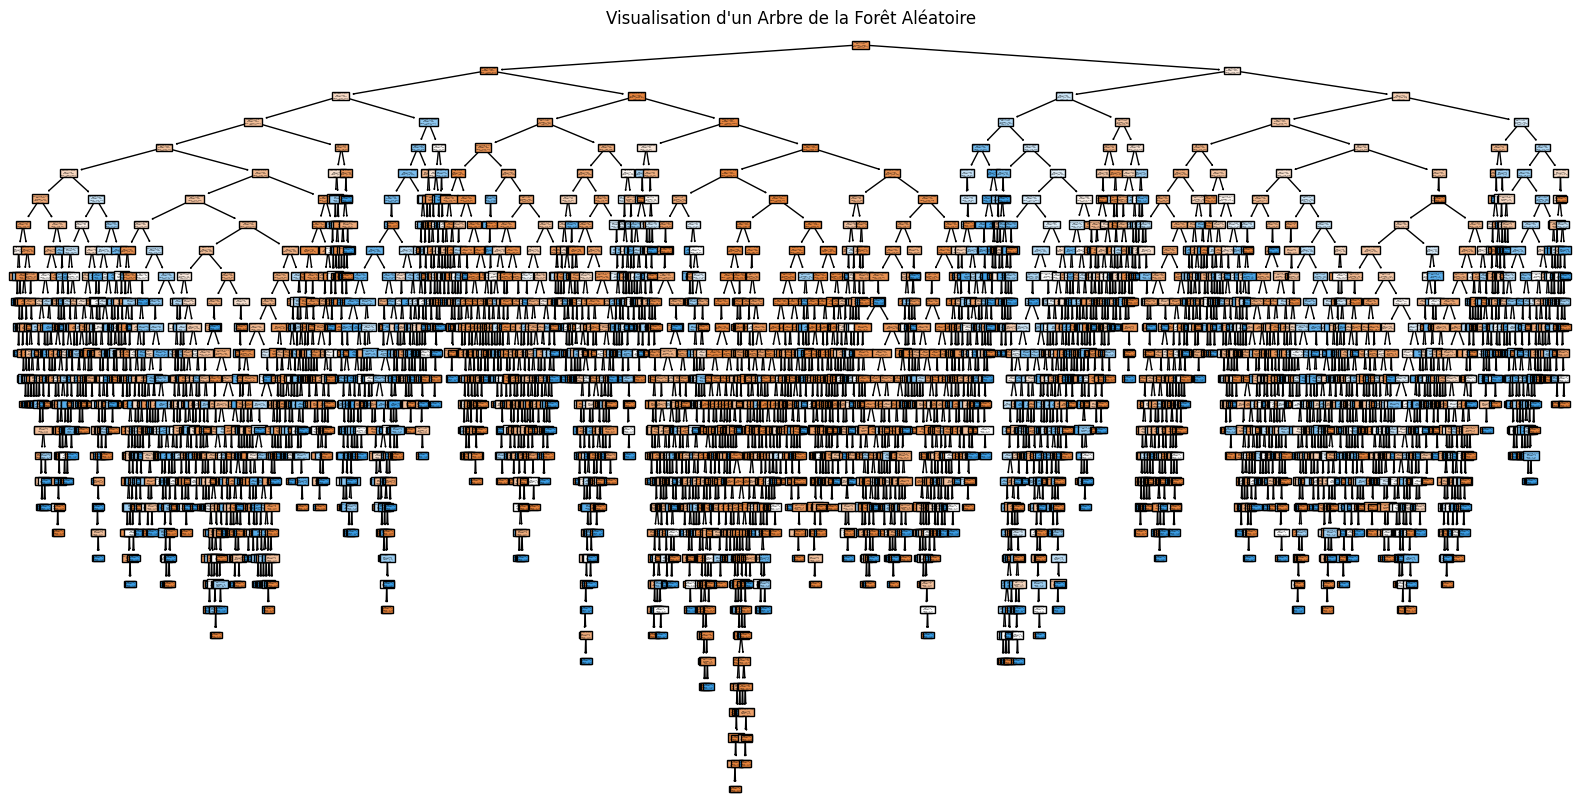

 Visualisation de  l'importance des variables...


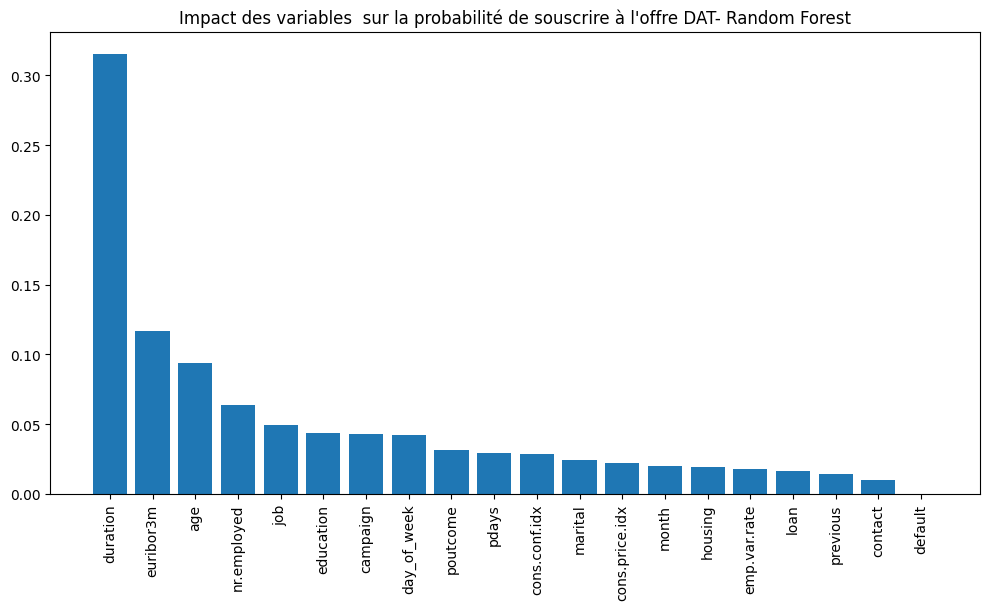

Le modèle Random Forest a été sauvegardé à l'emplacement : /content/sample_data/models/random_forest_model.pkl

 Modèle : XGradient Boosting
Probabilités  des prédictions des 20 premières observations:
[[0.95043843 0.04956157]
 [0.99011292 0.00988708]
 [0.99422834 0.00577166]
 [0.98363032 0.01636968]
 [0.99388287 0.00611713]
 [0.80642258 0.19357742]
 [0.99355201 0.00644799]
 [0.9968953  0.0031047 ]
 [0.99381681 0.00618319]
 [0.99718675 0.00281325]
 [0.85616236 0.14383764]
 [0.67788751 0.32211249]
 [0.44516555 0.55483445]
 [0.77243326 0.22756674]
 [0.99049355 0.00950645]
 [0.99513044 0.00486956]
 [0.99388287 0.00611713]
 [0.99496164 0.00503836]
 [0.99623145 0.00376855]
 [0.5213044  0.4786956 ]]

Prédictions des 100 premières observations:
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
Matrice de confusion:
[[7081  222]
 [ 448  487]]

Rapport de classification 
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.69 

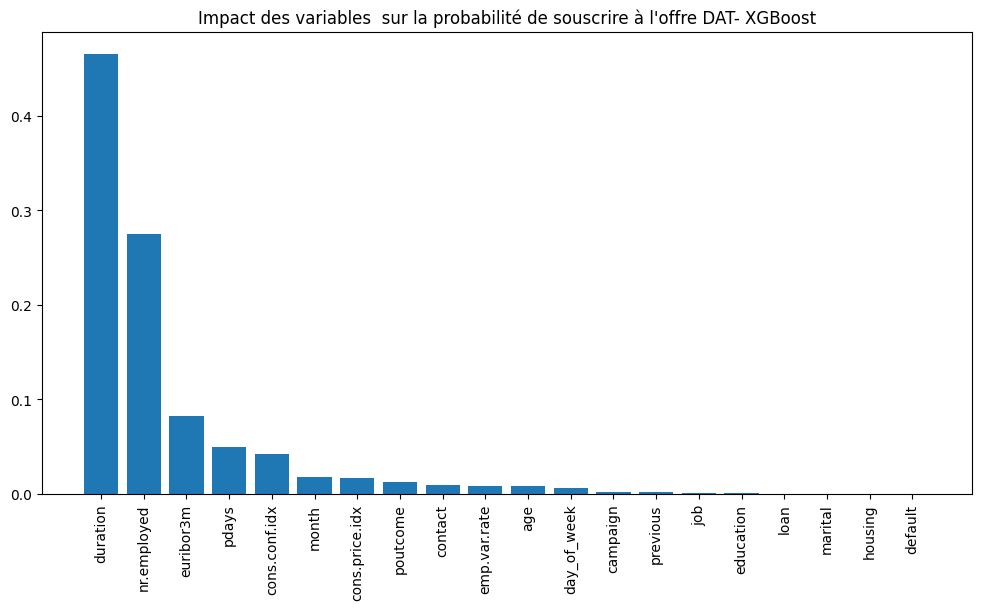

Le modèle XGradient Boosting a été sauvegardé à l'emplacement : /content/sample_data/models/xgradient_boosting_model.pkl


In [ ]:
#Importation des librairies relatives aux modèles d'apprentissage
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
import joblib
bank_data_cleaned = pd.read_csv("/content/bank_data_cleaned.csv")


#ETAPES DE LA  MODELISATION

# Séparation des features X et de la cible Y
X = bank_data_cleaned.drop(columns=['y'])
y = bank_data_cleaned['y']
# Affichage des datasets sauvegardés
print("X_train et X_test ont été sauvegardés")

# Split en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sauvegarde des DataFrames X_train et X_test
X_train_path = "/content/X_train.csv"
X_test_path = "/content/X_test.csv"

y_train_path = "/content/y_train.csv"
y_test_path = "/content/y_test.csv"

# Sauvegarde des fichiers
y_train.to_csv(y_train_path, index=False)
y_test.to_csv(y_test_path,index=False)

X_train.to_csv(X_train_path, index=False)
X_test.to_csv(X_test_path, index=False)

#  Definition des modèles
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Arbre de décisions": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGradient Boosting": GradientBoostingClassifier()
}

#Entraînement des modèles et rapport de classification
results = {}
# Dossier pour sauvegarder les modèles
models_save_dir = "/content/sample_data/models"
os.makedirs(models_save_dir, exist_ok=True)

for name, model in models.items():
    print(f"\n Modèle : {name}")

    # Entraînement de chaque  modèle
    model.fit(X_train, y_train)
    # Prédiction des probabilités sur les données de test par chaque modèle
    y_pred_proba = model.predict_proba(X_test)
    #prédiction des classes sur les données de test et affiche les 400 premières valeurs prédites.
    # affichage  des 20 premières valeurs prédites.
    y_pred = model.predict(X_test)

    # Affichage des 20 premières probabilités et des prédictions des classes
    print("Probabilités  des prédictions des 20 premières observations:")
    print(y_pred_proba[:20])

    print("\nPrédictions des 100 premières observations:")
    print(y_pred[:20])

    # Stock des résultats
    results[name] = {
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

    # AFFICHACHE DES RESULTATS DE CHAQUE MODELE
    print("Matrice de confusion:")
    print(confusion_matrix(y_test, y_pred))

    print("\nRapport de classification ")
    print(classification_report(y_test, y_pred))
    import matplotlib.pyplot as plt


     # Affichage de l'Arbre de Décision
    if name == "Arbre de décisions":
        print("Arbre de Décision:")
        plt.figure(figsize=(20, 10))
        plot_tree(model, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
        plt.title("Visualisation de l'Arbre de Décision")
        plt.show()
#Affichage de l'importance des variables pour l'Arbre de Décision
    if name == "Decision Tree":
        print("Impact des variables  sur la probabilité de souscrire à l'offre DAT- Arbre de Décision")
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

    # Affichage de Random Forest
    if name == "Random Forest":
        print("Random Forest:")
        plt.figure(figsize=(20, 10))
        plot_tree(model.estimators_[0], feature_names=X.columns, class_names=["No", "Yes"], filled=True)
        plt.title("Visualisation d'un Arbre de la Forêt Aléatoire")
        plt.show()

        # Affichage de l’importance des variables du modèle de  Random Forest
        print(" Visualisation de  l'importance des variables...")
        importances = model.feature_importances_
        indices = importances.argsort()[::-1]

        plt.figure(figsize=(12, 6))
        plt.title("Impact des variables  sur la probabilité de souscrire à l'offre DAT- Random Forest")
        plt.bar(range(X.shape[1]), importances[indices], align="center")
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.show()

 # Affichage de l'importance des variables pour la RÉGRESSION LOGISTIQUE
    if name == "Logistic Regression":
        print("Impact des variables  sur la probabilité de souscrire à l'offre DAT. - Régression Logistique")
         # Coefficients des variables
        coef_importances = model.coef_[0]
        indices = np.argsort(np.abs(coef_importances))[::-1]
                # Graphique de l'importance des variables
        plt.figure(figsize=(12, 6))
        plt.title("Impact des variables  sur la probabilité de souscrire à l'offre DAT- Régression Logistique")
        plt.bar(range(X.shape[1]), coef_importances[indices], align="center")
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.axhline(0, color='black', linewidth=0.5)
        plt.show()
# Affichage de la liste des coefficients
        print("\ Liste des coefficients :RÉGRESSION LOGISTIQUE")
        coef_list = [(X.columns[i], coef_importances[i]) for i in indices]
        for feature, coef in coef_list:
            print(f"{feature}: {coef}")


    # Affichage de l'importance des variables pour XGBoost
    if name == "XGradient Boosting":
        print("Impact des variables  sur la probabilité de souscrire à l'offre DAT. - XGBoost")
        importances = model.feature_importances_
        # Tri par importance décroissante
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 6))
        plt.title("Impact des variables  sur la probabilité de souscrire à l'offre DAT- XGBoost")
        plt.bar(range(X.shape[1]), importances[indices], align="center")
        plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
        plt.show()


# Sauvegarde des modèles d'apprentissage
    model_save_path = os.path.join(models_save_dir, f"{name.replace(' ', '_').lower()}_model.pkl")
    joblib.dump(model, model_save_path)
    print(f"Le modèle {name} a été sauvegardé à l'emplacement : {model_save_path}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**IV- EVALUATION DES MODELES**

**Régression logistique :**

Accuracy (Précision globale) : La précision globale du modèle est de 91%, ce qui signifie qu'il a correctement prédit 91% des observations. Toutefois, ce résultat peut être biaisé par le fait que la classe 0 (non-souscription) est beaucoup plus représentée. Le modèle pourrait avoir simplement appris à prédire cette classe majoritaire, ce qui fausse la performance générale.

Précision (Precision) : La précision pour la classe 1 (souscription) est de 67%, ce qui indique que lorsque le modèle prédit une souscription, il a raison dans 67% des cas. Il y a encore une part importante de faux positifs (prédire une souscription alors qu'il n'y en a pas).

Recall (Rappel) : Le rappel pour la classe 1 est de 42%, ce qui signifie que le modèle n’a détecté que 42% des souscriptions réelles. C’est relativement faible, ce qui montre que le modèle a du mal à repérer les souscriptions. Il rate une grande partie des cas où il devrait prédire une souscription.

F1-score : Le F1-score pour la classe 1 est de 0.52, ce qui est un peu faible. Cette métrique combine la précision et le rappel pour donner une idée générale de la performance sur la classe 1. Le score montre bien que, même si la précision n’est pas très efficace, le faible rappel tire le F1-score vers le bas.

Bien que le modèle ait une bonne précision globale, il lutte pour détecter les souscriptions. Il est efficace pour prédire les non-souscriptions, mais il rate trop de souscriptions réelles, ce qui impacte négativement son rappel et son F1-score pour cette classe.



**Arbre de décision :**

Accuracy (Précision globale) : Le modèle a une précision globale de 89%, ce qui est bon, mais cette métrique peut être trompeuse en raison du déséquilibre entre les classes. Bien que 89% des prédictions soient correctes, une grande partie des non-souscriptions (classe 0) est correctement prédite, ce qui contribue fortement à cette précision élevée.

Précision (Precision) : La précision pour la classe 1 (souscription) est de 51%, ce qui signifie que, parmi toutes les prédictions de souscriptions, seulement 51% sont effectivement des souscriptions réelles. C'est une amélioration par rapport à la régression logistique (67%), mais il y a encore un nombre important de faux positifs. Cela montre que le modèle fait parfois des erreurs en prédisant des souscriptions là où il n'y en a pas.

Recall (Rappel) : Le rappel de 49% pour la classe 1 indique que le modèle a correctement identifié 49% des souscriptions réelles. Bien que ce soit mieux que la régression logistique (42%), il reste encore un manque important de faux négatifs. Cela signifie que près de la moitié des souscriptions réelles sont manquées par le modèle.

F1-score : Le F1-score de 0.50 pour la classe 1 est relativement faible. Ce score résume l’équilibre entre la précision et le rappel, et ici il reflète le fait que, bien que la précision ait légèrement augmenté par rapport à la régression logistique, le faible rappel continue de pénaliser cette métrique.

 Le modèle d'arbre de décision est relativement performant avec une précision globale de 89%, mais il reste limité dans la détection des souscriptions. Il présente une précision de 51% et un rappel de 49% pour la classe 1, ce qui signifie qu'il fait encore beaucoup de faux positifs et manque une bonne partie des souscriptions réelles.



**Random Forest :**
Accuracy (Précision globale) : Le modèle a une précision globale de 90%, ce qui est légèrement supérieur à celui de l'arbre de décision (89%). Cela montre que le modèle de forêt aléatoire est globalement performant, en grande partie grâce à une prédiction correcte des non-souscriptions (classe 0).

Précision (Precision) : La précision pour la classe 1 (souscription) est de 55%, ce qui est supérieur à celle de l'arbre de décision (51%), mais reste relativement faible. Cela signifie que, lorsqu'il prédit une souscription, le modèle a raison dans seulement 55% des cas. Il y a donc encore des faux positifs, où le modèle prédit une souscription alors qu'il n'y en a pas.

Recall (Rappel) : Le rappel de 52% pour la classe 1 signifie que le modèle a correctement identifié 52% des souscriptions réelles. Bien que cela soit une amélioration par rapport à l'arbre de décision (49%), il y a encore un manque de détection des souscriptions. Environ la moitié des souscriptions réelles ne sont toujours pas repérées par le modèle.

F1-score : Le F1-score de 0.54 pour la classe 1 est une amélioration par rapport aux autres modèles, mais il reste assez faible. Ce score montre qu’il y a un compromis entre la précision et le rappel, et que le modèle n’a pas encore trouvé un bon équilibre entre éviter les faux positifs et ne pas manquer trop de souscriptions.


Le modèle Random Forest présente une précision globale de 90%, mais son rappel de 52% pour la classe 1 montre qu’il pourrait encore mieux détecter les souscriptions. La précision de 55% et le F1-score de 0.54 indiquent que bien que le modèle fasse mieux que l’arbre de décision en matière de souscriptions, il reste un certain nombre de faux positifs et des faux négatifs à améliorer.



**Gradient Boosting (XGBoost) :**

Accuracy (Précision globale) : Le modèle a une précision globale de 92%, ce qui est très bon. Cela signifie que 92% des prédictions du modèle sont correctes. Ce résultat est supérieur à celui des autres modèles (Random Forest et Arbre de décision), ce qui montre une performance globale très solide.

Précision (Precision) : La précision pour la classe 1 (souscription) est de 68%, ce qui est une amélioration significative par rapport aux autres modèles. Cela indique que, lorsqu'il prédit une souscription, le modèle a raison dans 68% des cas, ce qui est plutôt bon comparé aux 51% (Arbre de décision) et 55% (Random Forest).

Recall (Rappel) : Le rappel de 53% pour la classe 1 montre que le modèle a correctement identifié 53% des souscriptions réelles. Bien que ce chiffre soit plus élevé que pour les autres modèles (49% pour l’arbre de décision et 52% pour Random Forest), il est encore insuffisant. Il reste une part de faux négatifs, où les souscriptions réelles sont manquées par le modèle.

F1-score : Le F1-score de 0.60 pour la classe 1 est le meilleur parmi tous les modèles examinés. Cela montre un meilleur compromis entre précision et rappel. Bien que le modèle fasse mieux en termes de détection des souscriptions que les autres modèles, il reste encore des marges d'amélioration.

 Le modèle XGBoost a une précision globale de 92%, ce qui est impressionnant. Il améliore la détection des souscriptions avec une précision de 68% et un rappel de 53%, surpassant ainsi les autres modèles. Cependant, il reste des améliorations possibles pour mieux capturer toutes les souscriptions réelles et réduire davantage les faux négatifs. Le F1-score de 0.60 montre qu'il existe un bon compromis, mais il est encore possible d'optimiser davantage pour atteindre des performances plus élevées.

**Conclusion :**
Les modèles ont des performances variées. La régression logistique, avec une précision de 91%, est plus efficace pour prédire les non-souscriptions, mais manque de rappel pour les souscriptions. L'arbre de décision a une précision de 89%, mais il peine à prédire correctement les souscriptions, avec une précision de 51% pour la classe 1. Le modèle Random Forest, à 90% de précision globale, fait mieux que l'arbre de décision, mais son rappel reste insuffisant pour bien capturer les souscriptions. Enfin, XGBoost est le plus performant avec une précision de 92% et 68% pour la classe 1, bien qu'il manque encore des souscriptions réelles. Tous les modèles pourraient être améliorés pour mieux détecter les souscriptions.




**V-  MISE EN PRODUCTION ET RECOMMENDATIONS**

  

  1. Nous recommandons en priorité de cibler les clients ci-après ":"
  - Les clients qui ont manifesté un intérêt par le passée à une offre DAT , avec un échange téléphonique plus long ayant un profil universitaire;

  - les clients de tous profil ayant souscrit à l'offre dans une ancienne campagne;

  - Les clients pour lesquels le contact avec la abnque est très reccent sont une cible d'intérêt;

  - Pour ceux qui n'ont jamais été en contacte avec la banque , il faut plus les sensibiliser à l'épargne sans rien leur proposer, jusqu'à ce qu'ils fassent eux-même le premier pas. On peut recolter leur intérêt via des formulaires thématiques. il faudra dont cibler, ceux qui ont une éducation au moins de niveau lycée.

2. En ca de contrainte budgétaire , il faudra cibler d'abord ceux pour lesquels le modèle a prédit une souscription, et analyser le taux de succès comparé à la réalité, puis si , il y a un reste de budget aller vers la stratification proposée plus haut.

3. Les faux négatifs , sont ceux pour lesquels le modèle prédit, qu'ils ne vont pas souscrire, qui finalement souscrivent. Afin de limiter la perte d'opportunité, il faut resegmenter les clients sur la base des resultats obtenus du premier ciblage, afin de mieux comprendre les caractéristiques de ceux qui ont pas souscrire quand bien même que le modèle a prédit leur acceptation. Si leur profil est semblabe à ceux qui n'ont pas été ciblé, ont limite notre investissement, sinon on fait une nouvelle classification en les excluants et faisant une nouvelle campagne sur le reste de la population.

4. Nombre d'Acceptation réelle/ Nombre d'acceptation prévue
Temps de communication moyen/nombre de client ciblé vs temps de communication des clients ayant accepté/nombre d'acceptation (l'engagement client)
les Top 5 profile des clients qui accepte l'offre

5. les données macroéconomiques évolue en sens contraire de l'acceptation d'une offre. Donc il faudra faire une promotion spéciale pour les profiles qui sont très sensibles aux fluctuations conjoncturelles.

6. Un plan d'action serait:
- faire une premeière segmentation basée sur le niveau d'éduction;
- lancer une enquête sur la connaissance des produits d'épargne DAT;
- Organiser une session de formation par webinaire selon l'intérêt affiché ;

- valider les enquêtes avec les prédictions afin d'affiner la classification des cibles; - lancer une première campagne;
- évaluer le resultat vs la prédiction , - mettre à jpur le cible et relancer encore une autre campagne.
C'est routine et réitération permettra d'avoir une très bonne classification des clients au fil de l'eau.  

Le PCA pour les valeurs numériques, permettra de nous donner les composantes principales des informations que nous détenons sur les clients. Ce qui va nous permettre d'affiner notre ciblage et limiter la consommation de nos ressources. MANCOVA, mettra d'apprécier les variables catégoriques qui ont réellement une influence sur nos variables numériques et la décision d'acceptation ou pas. Ce qui facilitera nous segmentation sur les informations significatives.